In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Đọc tệp CSV
input_data = pd.read_csv('input.csv')
labels = pd.read_csv('labels.csv')
input_test = pd.read_csv('input_test.csv')
labels_test = pd.read_csv('labels_test.csv')

In [3]:
# Hiển thị dữ liệu
print(input_data.head())
print(labels.head())
print(input_test.head())
print(labels_test.head())

   3.700000000000000000e+01  3.900000000000000000e+01  \
0                     131.0                     128.0   
1                      80.0                      92.0   
2                     149.0                     173.0   
3                     255.0                     254.0   
4                     111.0                     117.0   

   2.500000000000000000e+01  2.600000000000000000e+01  \
0                     135.0                     160.0   
1                      88.0                      83.0   
2                     151.0                     131.0   
3                     239.0                     253.0   
4                     117.0                     107.0   

   2.400000000000000000e+01  9.000000000000000000e+00  \
0                     157.0                     164.0   
1                      96.0                      89.0   
2                     153.0                     132.0   
3                     246.0                     228.0   
4                     113.0  

In [4]:
X_train = np.array(input_data)
Y_train = np.array(labels)
X_test = np.array(input_test)
Y_test = np.array(labels_test)

In [5]:
# Chuyển đổi dữ liệu ảnh thành một vector một chiều
X_train_flattened = X_train.reshape(len(X_train), -1)
X_test_flattened = X_test.reshape(len(X_test), -1)

In [6]:
# Chuẩn hóa dữ liệu
X_train_flattened = X_train_flattened/255
X_test_flattened = X_test_flattened/255

In [7]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(1999, 30000)
(399, 30000)


In [8]:
# Định nghĩa mô hình Hồi quy Logistic
model = LogisticRegression()

In [9]:
# Huấn luyện mô hình
model.fit(X_train_flattened, Y_train)

C:\Users\ProTech Computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ProTech Computer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Dự đoán trên tập kiểm thử
Y_pred = model.predict(X_test_flattened)

In [11]:
# Đánh giá mô hình
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [12]:
print(f'Độ chính xác: {accuracy}')
print(f'Độ chính xác: {precision}')
print(f'Độ phủ: {recall}')
print(f'Điểm F1: {f1}')
print(f'ROC AUC: {roc_auc}')

Độ chính xác: 0.5914786967418546
Độ chính xác: 0.5844748858447488
Độ phủ: 0.64
Điểm F1: 0.6109785202863961
ROC AUC: 0.591356783919598


In [86]:
id2=random.randint(0,len(Y_test))
y_pred=model.predict(X_test_flattened[id2,:].reshape(1,-1))
if(y_pred<0.5):
    pred ='dog'
else:
    pred ='cat'

print('Mô hình dự đoán là:',pred)

Mô hình dự đoán là: cat


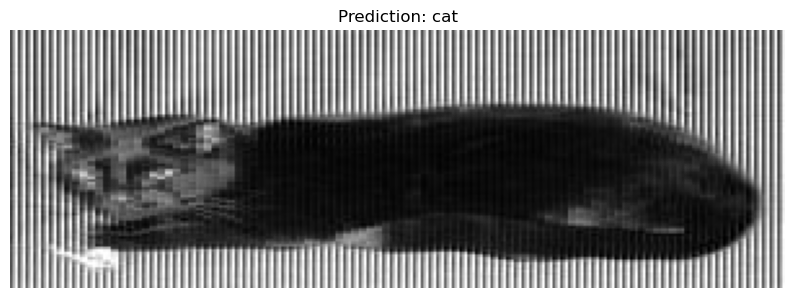

In [89]:
# Hiển thị hình ảnh từ tập kiểm thử cùng với dự đoán
# Giả sử kích thước ảnh là 100x300
image_shape = (100, 300)  # Thay đổi theo kích thước thực tế của ảnh

# Đặt kích thước hiển thị lớn hơn
plt.figure(figsize=(10, 10))  # Điều chỉnh kích thước theo mong muốn
image = X_test[id2].reshape(image_shape)
plt.imshow(image, cmap='gray')
plt.title(f'Prediction: {pred}')
plt.axis('off')  # Tắt trục để hiển thị hình ảnh đẹp hơn
plt.show()

(399, 30000)
